#**Business Case: Aerofit - Descriptive Statistics & Probability:**

#**1.	Defining Problem Statement and Analysing basic metrics (10 Points)**

##**1.1 Problem Statement:**

**About Aerofit :** Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people


**Business Problem:** The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.


1.	Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.


2.	For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.


**Product Portfolio:**

•	The KP281 is an entry-level treadmill that sells for $1,500.

•	The KP481 is for mid-level runners that sell for $1,750.

•	The KP781 treadmill is having advanced features that sell for $2,500.



##**1.2 Analysing Basic Metrics:**

**Importing Required Libraries:**

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from IPython.display import display, Markdown

**Uploading the Dataset:**

In [59]:
df = pd.read_csv("aerofit_treadmill.csv")

**Top 5 frames of the dataset**

In [60]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


**Checking information about the dataset:**

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Checking for shape of the Dataset:**

In [62]:
print("Shape of Data:", df.shape)

Shape of Data: (180, 9)


**Checking for data types of all attributes:**

In [63]:
print("Data Types    (Before Conversion)\n", df.dtypes)


Data Types    (Before Conversion)
 Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object


**Conversion of categorical attributes to 'category'**

In [64]:
categorical_cols = ['Product', 'Gender', 'MaritalStatus']
for col in categorical_cols:
    df[col] = df[col].astype('category')

print("\nData Types (After Conversion):\n", df.dtypes)



Data Types (After Conversion):
 Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object


**Statistical Summary of the data:**

In [65]:
print("\nStatistical Summary:\n", df.describe())


Statistical Summary:
               Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.000000    3.000000   50596.500000   
75%     33.000000   16.000000    4.000000    4.000000   58668.000000   
max     50.000000   21.000000    7.000000    5.000000  104581.000000   

            Miles  
count  180.000000  
mean   103.194444  
std     51.863605  
min     21.000000  
25%     66.000000  
50%     94.000000  
75%    114.750000  
max    360.000000  


##**Obsevations on the dataset:**

**Shape of Data:**
The dataset has 180 rows (customers) and 9 columns (attributes).

**Attributes:**

**Categorical Variables (converted to category type):**

Product : KP281, KP481, KP781

Gender : Male, Female

MaritalStatus : Single, Partnered

**Numeric Variables:**

Age : 18–50 years

Education : 12–21 years of education

Usage : 2–7 times per week

Fitness : 1–5 rating scale

Income : 29,562 – 104,581 USD

Miles : 21 – 360 miles per week

**Data Types Before Conversion:**

Product, Gender, MaritalStatus → object

Age, Education, Usage, Fitness, Income, Miles → int64

**Data Types After Conversion:**

Product, Gender, MaritalStatus → category

Age, Education, Usage, Fitness, Income, Miles → int64

#**2.Non-Graphical Analysis: Value counts and unique attributes (10 Points)**

##**2.1 Value Counts of the attributes:**

In [66]:
product = df['Product'].value_counts().reset_index()
product.columns = ['Product', 'Count']
product.head()

,Product,Count
0,KP281,80
1,KP481,60
2,KP781,40


In [67]:
age = df['Age'].value_counts().reset_index()
age.columns = ['Age', 'Count']
age.head()

,Age,Count
0,25,25
1,23,18
2,24,12
3,26,12
4,28,9


In [68]:
Gender = df['Gender'].value_counts().reset_index()
Gender.columns = ['Gender', 'Count']
Gender.head()

,Gender,Count
0,Male,104
1,Female,76


In [69]:
Education = df['Education'].value_counts().reset_index()
Education.columns = ['Education', 'Count']
Education.head()

,Education,Count
0,16,85
1,14,55
2,18,23
3,15,5
4,13,5


In [70]:
MaritalStatus = df['MaritalStatus'].value_counts().reset_index()
MaritalStatus.columns = ['MaritalStatus', 'Count']
MaritalStatus.head()

,MaritalStatus,Count
0,Partnered,107
1,Single,73


In [71]:
Usage = df['Usage'].value_counts().reset_index()
Usage.columns = ['Usage', 'Count']
Usage.head()

,Usage,Count
0,3,69
1,4,52
2,2,33
3,5,17
4,6,7


In [72]:
Fitness = df['Fitness'].value_counts().reset_index()
Fitness.columns = ['Fitness', 'Count']
Fitness.head()

,Fitness,Count
0,3,97
1,5,31
2,2,26
3,4,24
4,1,2


In [73]:
Income = df['Income'].value_counts().reset_index()
Income.columns = ['Income', 'Count']
Income.head()

,Income,Count
0,45480,14
1,52302,9
2,53439,8
3,54576,8
4,46617,8


In [74]:
Miles = df['Miles'].value_counts().reset_index()
Miles.columns = ['Miles', 'Count']
Miles.head()


,Miles,Count
0,85,27
1,95,12
2,66,10
3,75,10
4,47,9


##**2.2 Unique Values in the Attributes:**

In [75]:
for col in df.columns:
    if df[col].dtype.name == 'category':
        print(f"{col}: {df[col].nunique()} unique values -> {list(df[col].unique())}")
    else:
        print(f"{col}: {df[col].nunique()} unique values")

Product: 3 unique values -> ['KP281', 'KP481', 'KP781']
Age: 32 unique values
Gender: 2 unique values -> ['Male', 'Female']
Education: 8 unique values
MaritalStatus: 2 unique values -> ['Single', 'Partnered']
Usage: 6 unique values
Fitness: 5 unique values
Income: 62 unique values
Miles: 37 unique values


#**3.Visual Analysis - Univariate & Bivariate (30 Points)**

##**3.1 Visual Analysis of Continuous Variables:**

/tmp/ipython-input-3370345632.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], hist=True, kde=True,


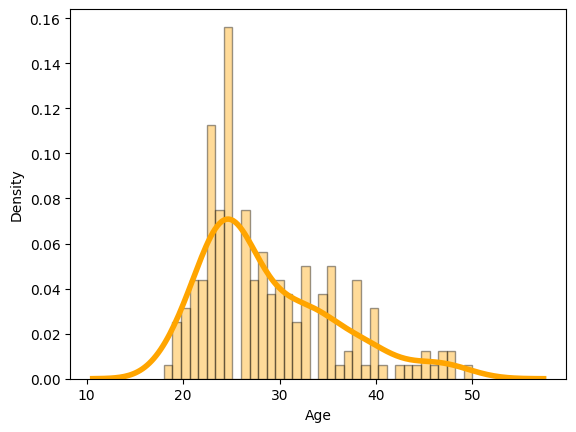

In [76]:
# Observing the age wise data to create bins

sns.distplot(df['Age'], hist=True, kde=True,
bins=int(36), color = 'orange',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

In [77]:
# Creating bins on intervals of 5 as age gaps between upto 20 years and above 40 years

bins = [0,20,25,30,35,40,55]
labels = ['<20','20-25','25-30','30-35','35-40','40+']
df['Age_Bins'] = pd.cut(df['Age'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20
1,KP281,19,Male,15,Single,2,3,31836,75,<20
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20
3,KP281,19,Male,12,Single,3,3,32973,85,<20
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20


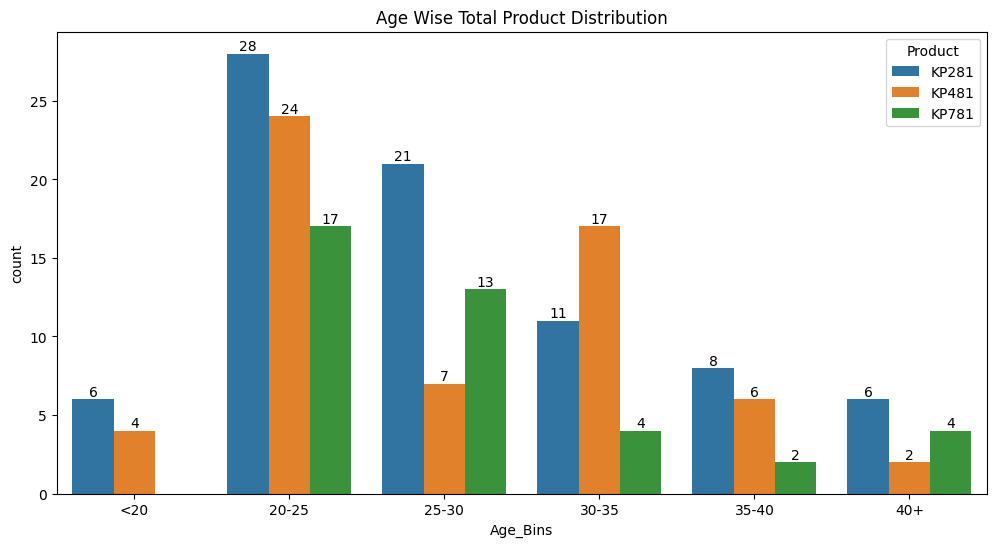

In [78]:
# Age wise Total Product Distribution

plt.figure(figsize=(12,6))
ax = sns.countplot(x='Age_Bins', hue='Product', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title('Age Wise Total Product Distribution')
plt.show()

**Insight: -** People of age group 20-25 purchase more number of treadmills. - 80% of purchasers are from 20 to 35 age group. - 62% of purchases are from age group of 20-30 years.

/tmp/ipython-input-2608745381.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'], hist=True, kde=True,


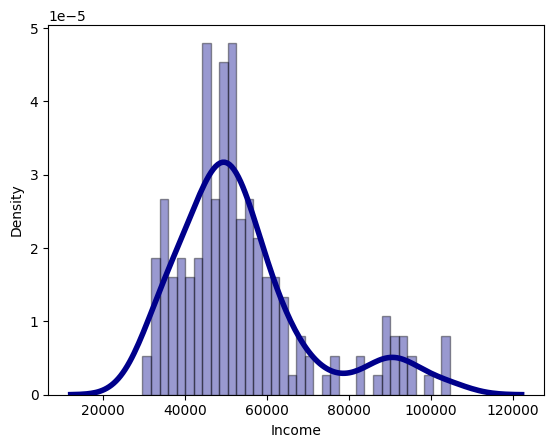

In [79]:
# Observing the income wise data to create bins

sns.distplot(df['Income'], hist=True, kde=True,
bins=int(36), color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

In [80]:
# Creating bins on intervals of $5000 as income gaps between upto $35,000 and above $90,000

bins = [0,35000,45000,50000,60000,70000,90000,120000]
labels = ['<35000','35000-45000','45000-50000','50000-60000','60000-70000','70000-90000','90000+']
df['Income_Bins'] = pd.cut(df['Income'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Bins,Income_Bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,<35000
1,KP281,19,Male,15,Single,2,3,31836,75,<20,<35000
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,<35000
3,KP281,19,Male,12,Single,3,3,32973,85,<20,<35000
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,35000-45000


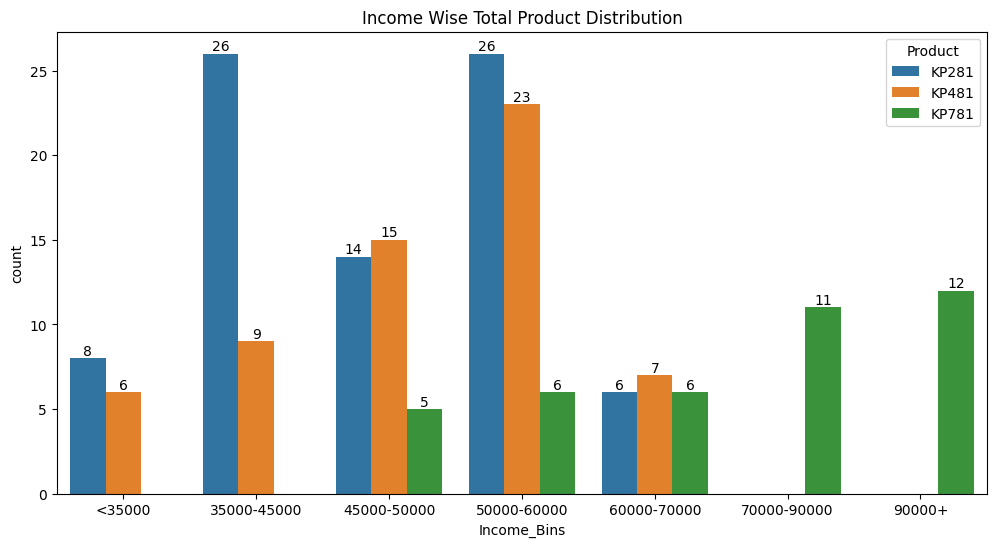

In [81]:
# Income wise Total Product Distribution

plt.figure(figsize=(12,6))
ax = sns.countplot(x='Income_Bins', hue='Product', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title('Income Wise Total Product Distribution')
plt.show()

**Insight: -**
- People who had lower income than 60,000 usually prefer KP281 treamill followed  by KP481.
- People who had income more than 50,000 usually prefer to buy KP781 tradnill over KP281 & KP481
- Most of the treadmill purchase by the people who's income is in betweem  35,000 𝑡𝑜 60,000

/tmp/ipython-input-228342820.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Miles'], hist=True, kde=True,


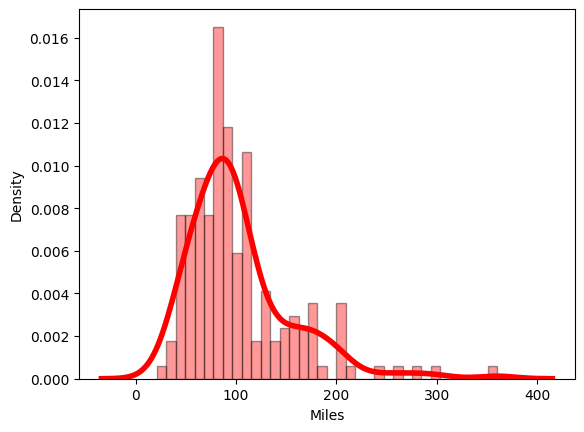

In [82]:
# Observing the Miles wise data to create bins

sns.distplot(df['Miles'], hist=True, kde=True,
bins=int(36), color = 'red',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

In [83]:
# Creating bins on intervals of 50 as miles gaps between upto 20 and above 150

bins = [0,50,100,150,400]
labels = ['<50','50-100','100-150','150+']
df['Mile_Bins'] = pd.cut(df['Miles'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Bins,Income_Bins,Mile_Bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,<35000,100-150
1,KP281,19,Male,15,Single,2,3,31836,75,<20,<35000,50-100
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,<35000,50-100
3,KP281,19,Male,12,Single,3,3,32973,85,<20,<35000,50-100
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,35000-45000,<50


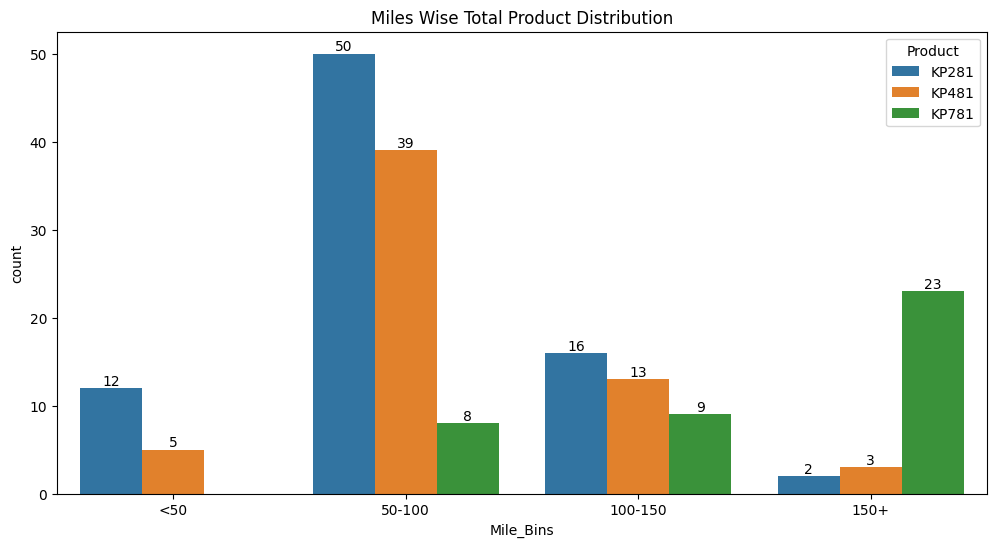

In [84]:
# Miles wise Total Product Distribution

plt.figure(figsize=(12,6))
ax = sns.countplot(x='Mile_Bins', hue='Product', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title('Miles Wise Total Product Distribution')
plt.show()

**Insight:**
- Pleople who purchased KP281 treadmill generally walk/run 50 -100 miles in each week.
- The people who bought KP781 generally thouse people who walk/run above 50 miles in each week.

##**3.2 Visual Analysis of Categorical Variables:**

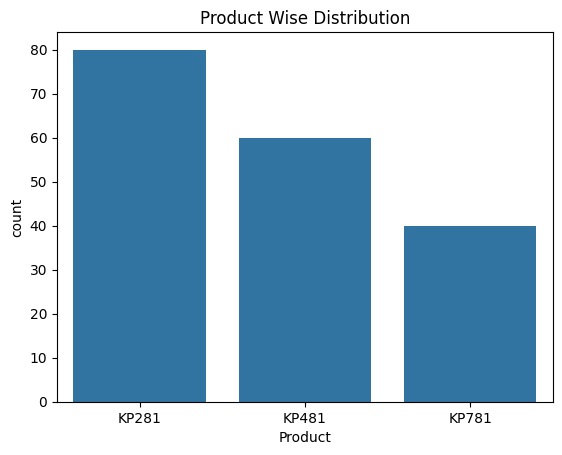

In [85]:
# Product wise Distribution

type = sns.countplot(data=df,x=df["Product"],order=df["Product"].value_counts().index)
plt.title('Product Wise Distribution')
plt.show()

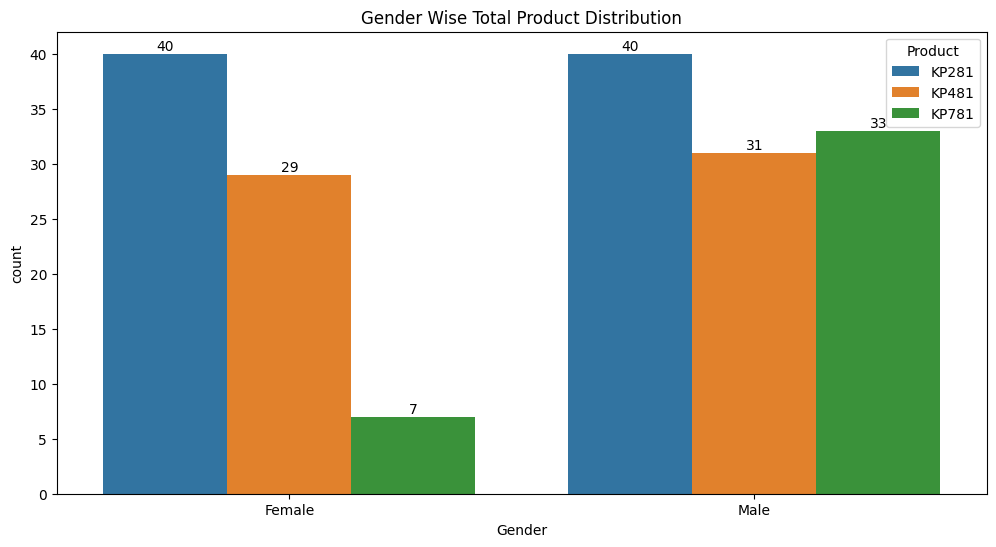

In [86]:
# Gender wise Total Product Distribution

plt.figure(figsize=(12,6))
ax = sns.countplot(x='Gender', hue='Product', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title('Gender Wise Total Product Distribution')
plt.show()

**Insight: -**
Males purchase more number of KP781 treadmill as compare to female nearly 4.5 times more. - There are nearly equal number of male & female who purchase KP281 and KP481 treadmill. - Arround 53% of women preder KP281 and only 9% prefer KP781. - Arround 38% of men prefer KP281 and reaming purchase KP481 and KP781

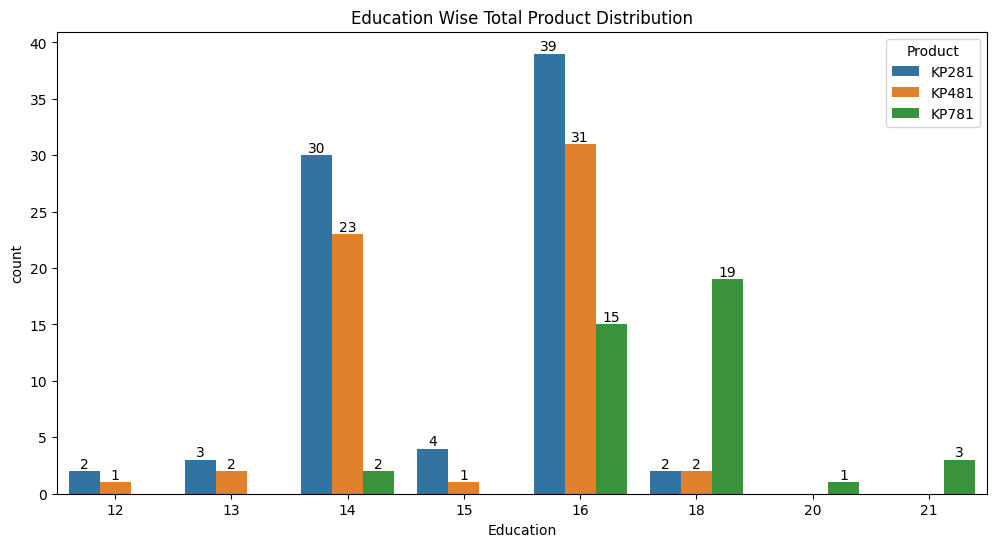

In [87]:
# Education wise Total Product Distribution

plt.figure(figsize=(12,6))
ax = sns.countplot(x='Education', hue='Product', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title('Education Wise Total Product Distribution')
plt.show()

**Insight: -** People who had 16 education years purchased highest numbers of treadmills followed by education year 14. - People of 18 educational year purchased highest number of KP781 treadmills. - People more than 18 educational year preferred KP781 treadmill. - Peolpe less than 14 educational year did not prefer KP781.

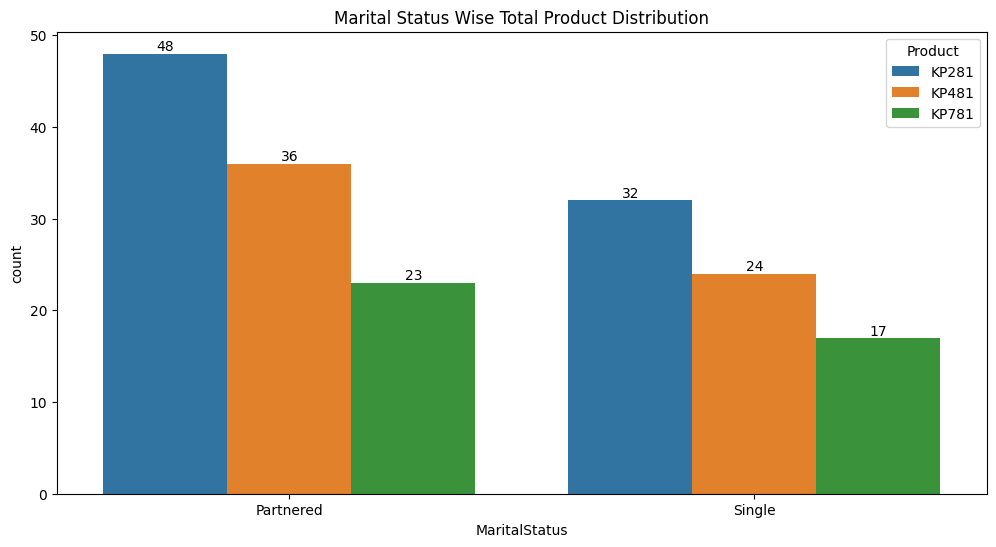

In [88]:
# Marital Status wise Total Product Distribution

plt.figure(figsize=(12,6))
ax = sns.countplot(x='MaritalStatus', hue='Product', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title('Marital Status Wise Total Product Distribution')
plt.show()

**Insight: -** Partnered/Married people purchased more treadmills as compare to single people.

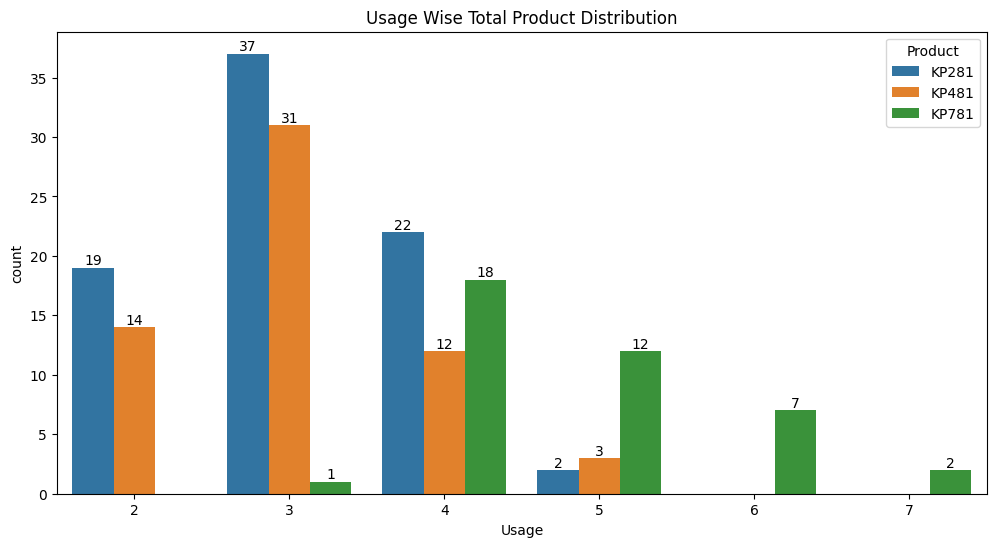

In [89]:
 # Usage wise Total Product Distribution

plt.figure(figsize=(12,6))
ax = sns.countplot(x='Usage', hue='Product', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title('Usage Wise Total Product Distribution')
plt.show()

**Insight: -** Nearly 6 times people uses 2 to 4 times plans to use the treadmill in each week. - Most people use treadmill 3 times in a week. - The people who purchase KP781 treadmill plans to use it more than 4 times in each week.

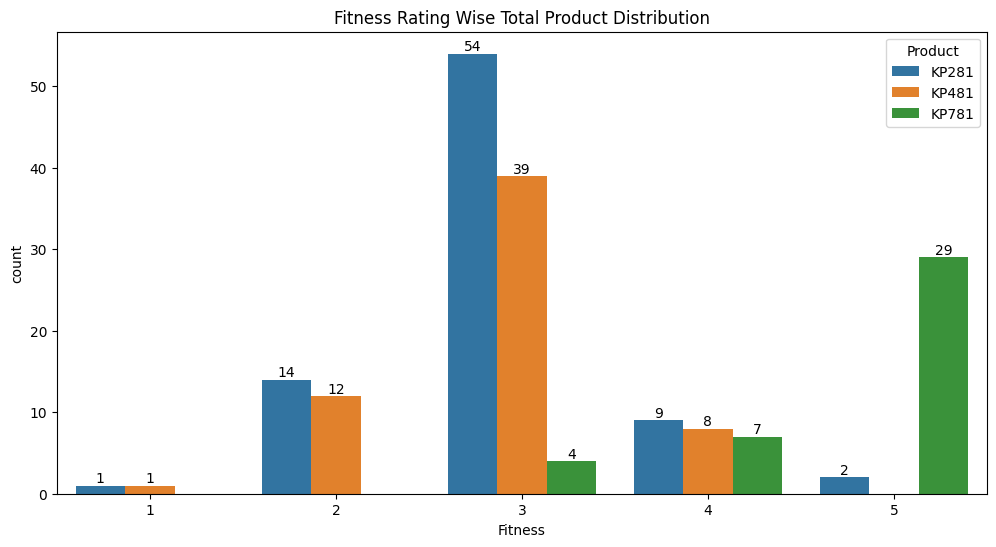

In [90]:
# Fitness wise Total Product Distribution

plt.figure(figsize=(12,6))
ax = sns.countplot(x='Fitness', hue='Product', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title('Fitness Rating Wise Total Product Distribution')
plt.show()

**Insight: -** Nearly 54% people rate them 3 interms of their fitness. - People who purchase KP781 treadmill thinks they are more fitt as compair to other persons who purchase KP281 & KP481 - People who rate them 2 and below did not prefer KP781 treadmill.

Text(0.5, 1.0, 'Relationship between product and Miles')

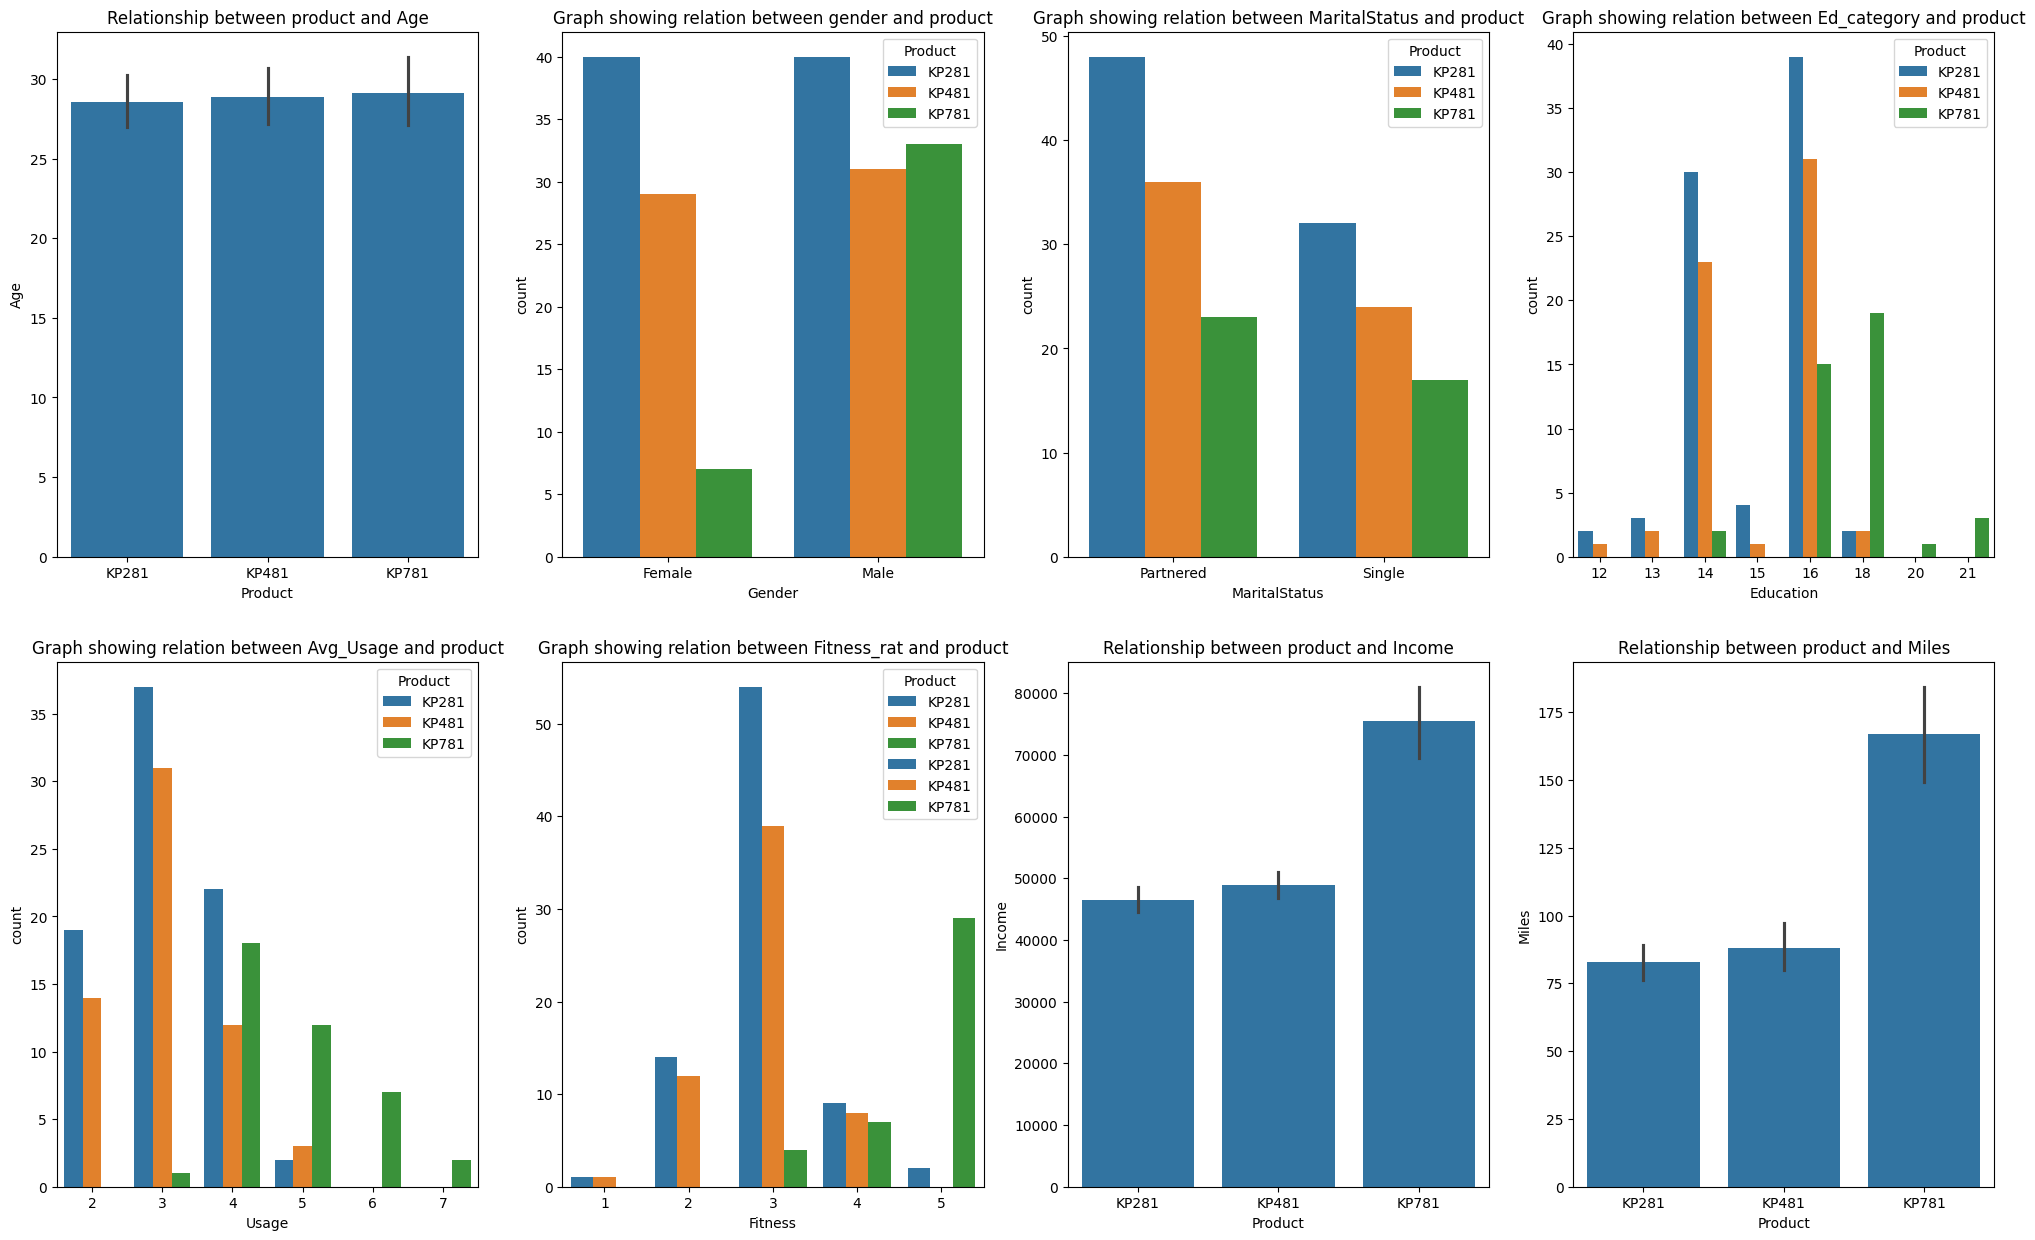

In [91]:
#Relationship of product with all the columns
plt.figure(figsize = (25,15))

plt.subplot(2,4,1)
sns.barplot(x = 'Product',y = 'Age',data = df)
plt.title('Relationship between product and Age')

plt.subplot(2,4,2)
sns.countplot(x = 'Gender', data = df, hue = 'Product')
plt.title('Graph showing relation between gender and product')

plt.subplot(2,4,3)
sns.countplot(x = 'MaritalStatus', data = df, hue = 'Product')
plt.title('Graph showing relation between MaritalStatus and product')

plt.subplot(2,4,4)
sns.countplot(x = 'Education', data = df, hue = 'Product')
plt.title('Graph showing relation between Ed_category and product')

plt.subplot(2,4,5)
sns.countplot(x = 'Usage', data = df, hue = 'Product')
plt.title('Graph showing relation between Avg_Usage and product')

plt.subplot(2,4,6)
sns.countplot(x = 'Fitness', data = df, hue = 'Product')
plt.title('Graph showing relation between Fitness_rat and product')

plt.subplot(2,4,6)
sns.countplot(x = 'Fitness', data = df, hue = 'Product')
plt.title('Graph showing relation between Fitness_rat and product')

plt.subplot(2,4,7)
sns.barplot(x = 'Product',y = 'Income',data = df)
plt.title('Relationship between product and Income')

plt.subplot(2,4,8)
sns.barplot(x = 'Product',y = 'Miles',data = df)
plt.title('Relationship between product and Miles')

**Inference**

1. Product KP281 is popular in both the genders.KP481 is popular higher in males as compare to females.KP781 is popular only in males.
2. People are partnered is likely to purchase a product then the people who are not.
3. As per the education Middle school and high school likely to purchase the KP281 and KP481. College likely to purchase only KP781. Lower education is shouldn't be a traget audience as there is less chance that they will purchase a Treadmill
4. People who are infrequent user likely to purchase KP381 and KP481 and people are dedicated would purchase KP781. Rest of the class would randomly purchase any of the threadmill.
5. People who have Excellent fitness would purchase KP781 and people with Fair Fitness and Poor Fitness will purchase KP281 and KP481
6. People with high income would love to purchase the KP781 and lower to middle income group would love to purchase KP781.
7. If the miles run is higher cutsomer likely to purchase KP781


##**3.3 Corelation Between Columns:**

Using Heatmap to check for the correlation between the Numerical columns in the dataset. This help to know which columns are highly correalted to the other column

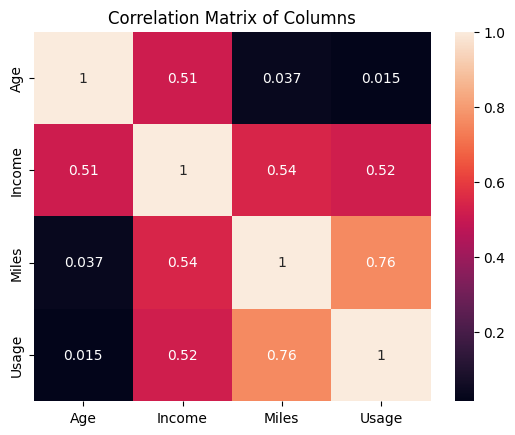

In [92]:
df1 = df[['Age','Income','Miles',"Usage"]]
sns.heatmap(df1.corr(),annot = True)
plt.title('Correlation Matrix of Columns')
plt.show()

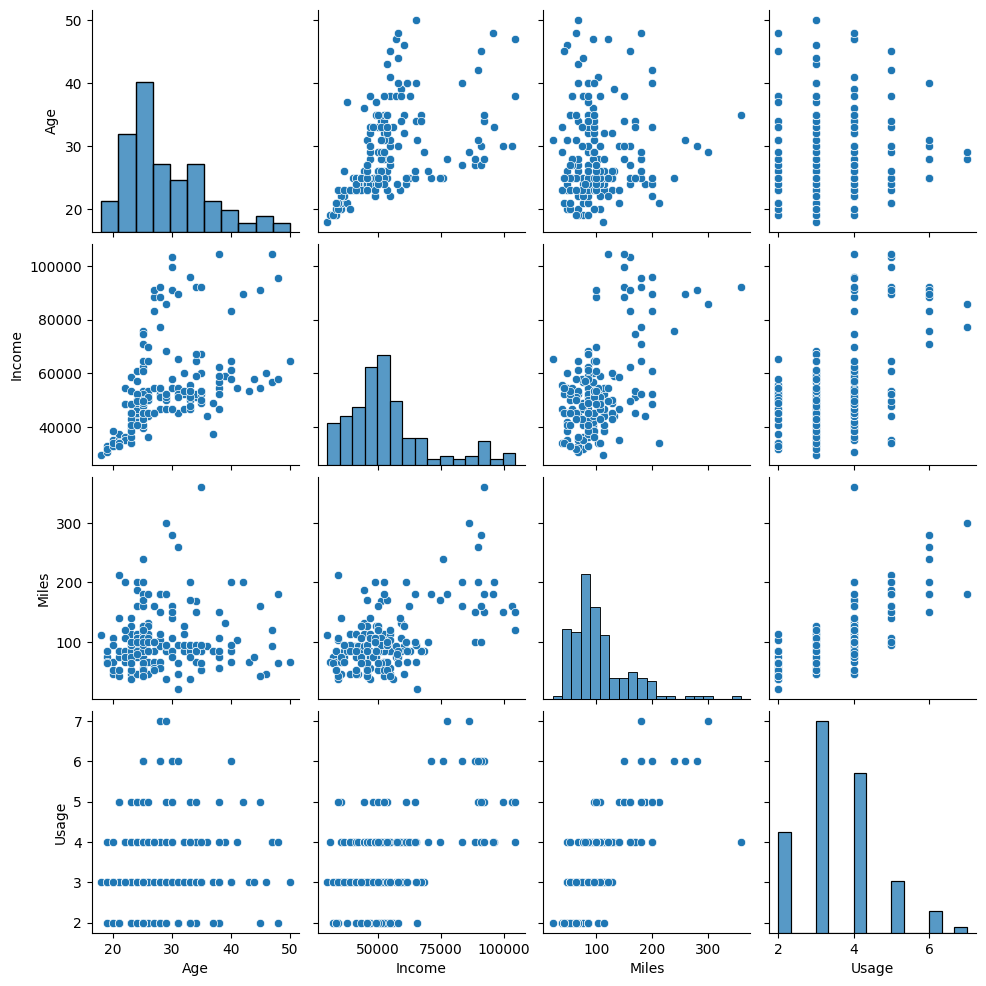

In [93]:
sns.pairplot(df1)
plt.show()

**Insight: -**
Here we can see age is highly correlated with income.
- Geneder did not have any such correlation with other parameter that meens it did not impact on purchaing.
- Eductaion is highly correlated with income as its obvious. It also has impact on product purchased. Eductation also have significatnt correlation between fitness rating and Usage of the treadmill.
- Marital Status has smaller correlation between Age and Income.
- Usage is extremely correlated with Fitness and Miles and has a higher correlation with Income and Education as well.
- Income is highly correlated with Product and Education. It also had good correlation with Age, usage, Fitness, Miles.
- From above we can say that Product is extremely correlated with Income, Education, Fitness, Usage along with Miles.
- We can say that Age and Education are indicator of Income which affect the product bought. The more advance the Product is the more its Usage and hence more the miles run which result into imroved Fitness rating.

#**4.Missing Values and Outlier Detection:**

##**4.1 Missing Values Detection:**

In [94]:
print(df.isnull().sum())

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
Age_Bins         0
Income_Bins      0
Mile_Bins        0
dtype: int64


**Inference:** There are no null values in the data.

##**4.2 Outlier Detection:**

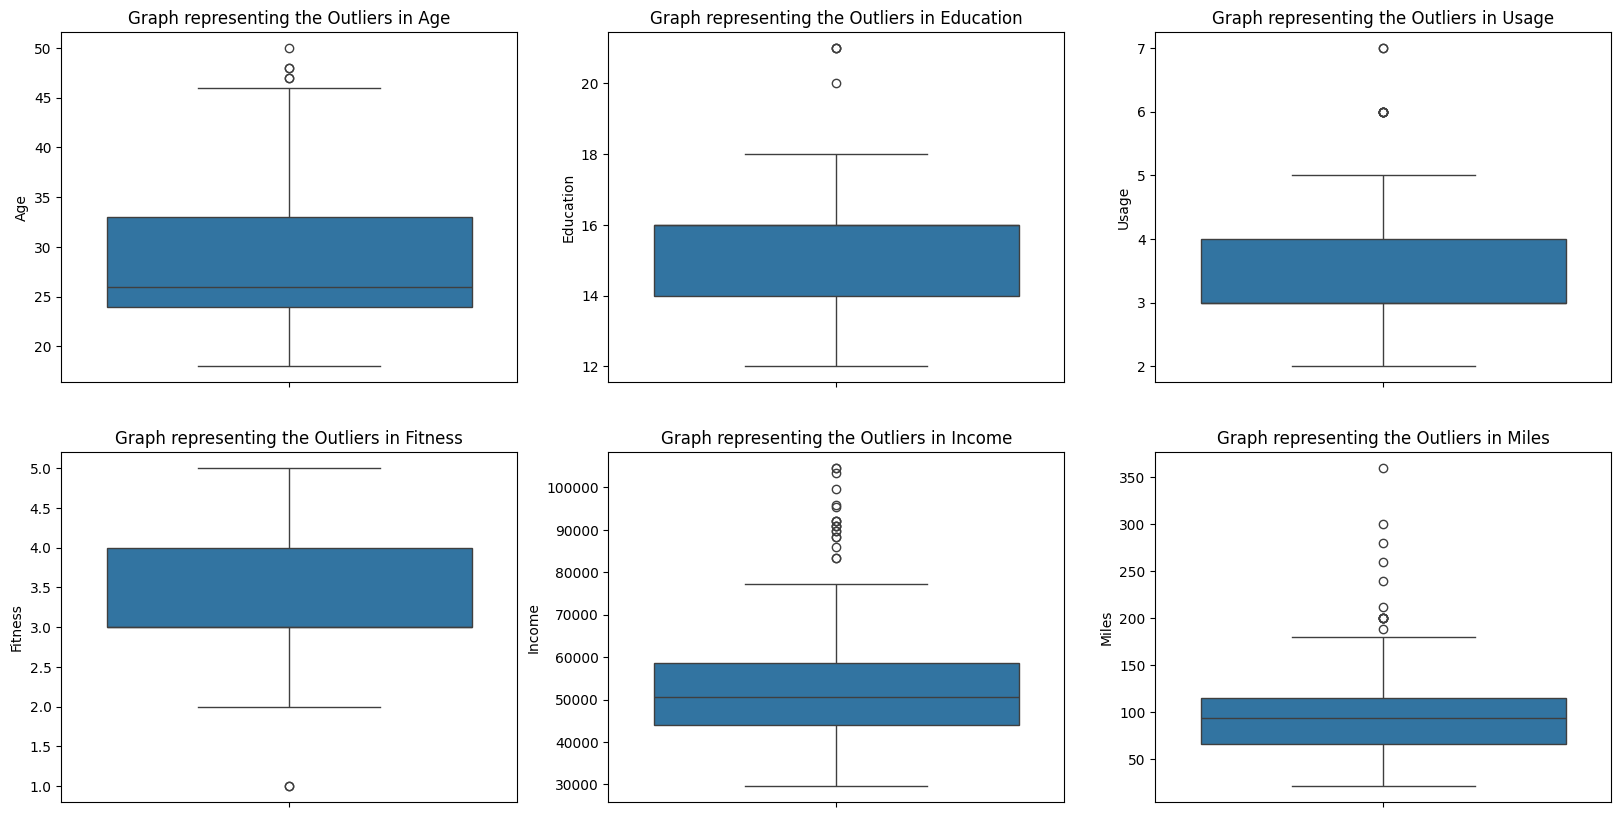

In [95]:
#checking for outliers in the  Age,Education,Usage,Fitness,Income,Miles using Boxplot.
fig = plt.figure(figsize = (20,10))
plt.subplot(2,3,1)
sns.boxplot(df['Age'])
plt.title('Graph representing the Outliers in Age')

plt.subplot(2,3,2)
sns.boxplot(df['Education'])
plt.title('Graph representing the Outliers in Education')

plt.subplot(2,3,3)
sns.boxplot(df['Usage'])
plt.title('Graph representing the Outliers in Usage')


plt.subplot(2,3,4)
sns.boxplot(df['Fitness'])
plt.title('Graph representing the Outliers in Fitness')


plt.subplot(2,3,5)
sns.boxplot(df['Income'])
plt.title('Graph representing the Outliers in Income')


plt.subplot(2,3,6)
sns.boxplot(df['Miles'])
plt.title('Graph representing the Outliers in Miles')
plt.show()

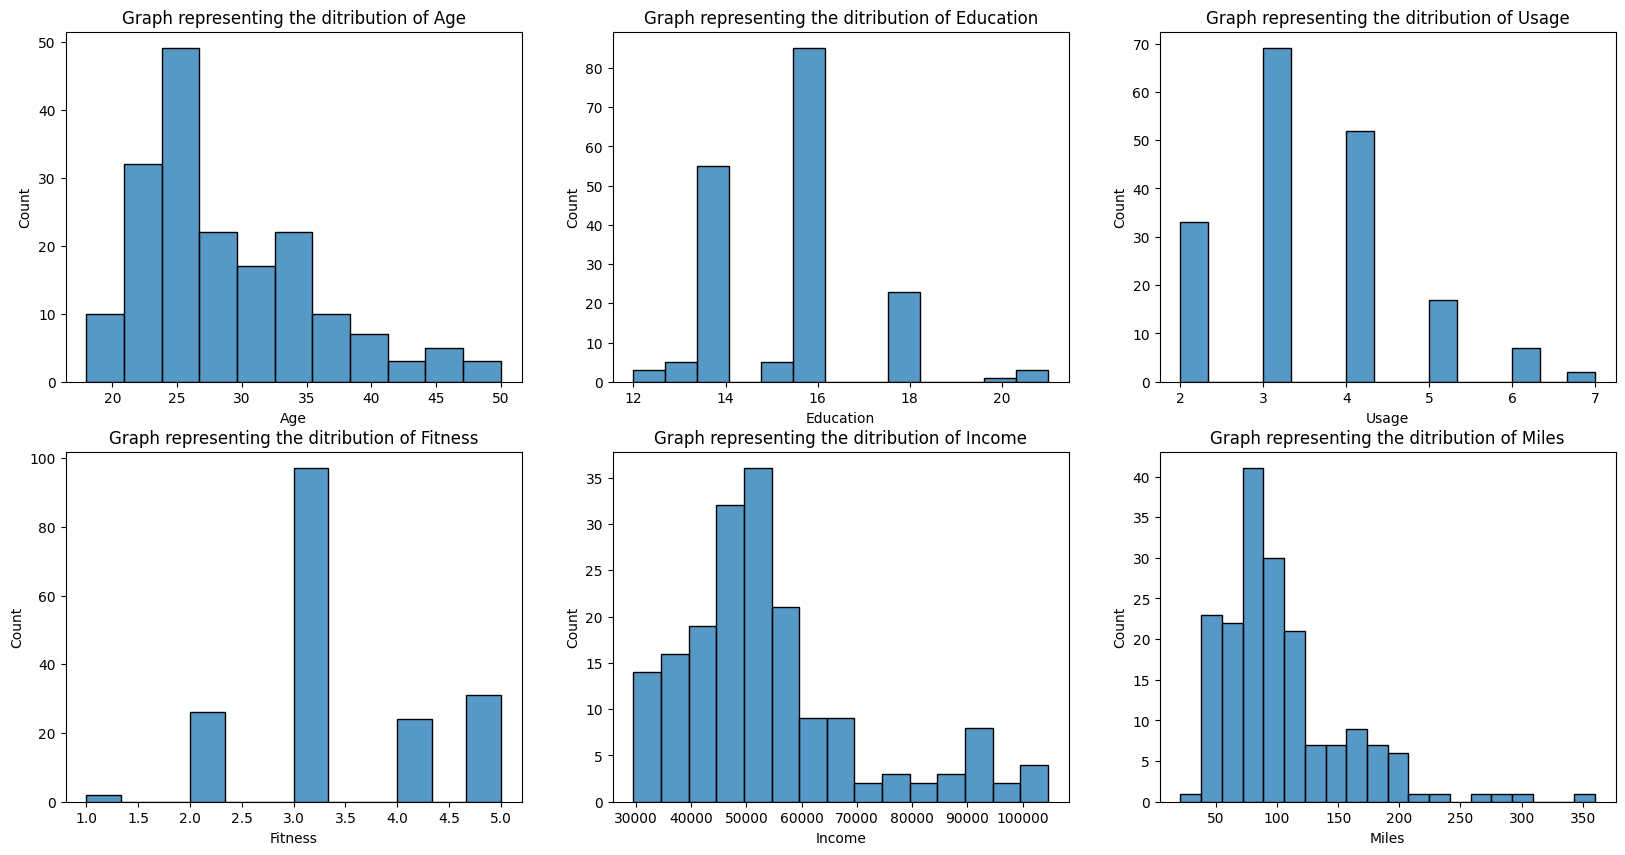

In [96]:
#checking if the data is normally distributed in the  Age,Education,Usage,Fitness,Income,Miles using Boxplot.
fig = plt.figure(figsize = (20,10))
plt.subplot(2,3,1)
sns.histplot(df['Age'])
plt.title('Graph representing the ditribution of Age')

plt.subplot(2,3,2)
sns.histplot(df['Education'])
plt.title('Graph representing the ditribution of Education')

plt.subplot(2,3,3)
sns.histplot(df['Usage'])
plt.title('Graph representing the ditribution of Usage')


plt.subplot(2,3,4)
sns.histplot(df['Fitness'])
plt.title('Graph representing the ditribution of Fitness')


plt.subplot(2,3,5)
sns.histplot(df['Income'])
plt.title('Graph representing the ditribution of Income')


plt.subplot(2,3,6)
sns.histplot(df['Miles'])
plt.title('Graph representing the ditribution of Miles')
plt.show()

**Checking that what values are outliers in the Age.**

In [97]:
percentile_25 = df.Age.quantile(0.25)
percentile_75 = df.Age.quantile(0.75)
median = df.Age.median()
lower_limit = percentile_25 - 1.5*(percentile_75 - percentile_25)
lower_limit = 0 if lower_limit < 0 else lower_limit
upper_limit = percentile_75 + 1.5*(percentile_75 - percentile_25)
print(f'lower_limit:{lower_limit}, upper_limit: {upper_limit}')

lower_limit:10.5, upper_limit: 46.5


In [98]:
df[df.Age > upper_limit]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Bins,Income_Bins,Mile_Bins
78,KP281,47,Male,16,Partnered,4,3,56850,94,40+,50000-60000,50-100
79,KP281,50,Female,16,Partnered,3,3,64809,66,40+,60000-70000,50-100
139,KP481,48,Male,16,Partnered,2,3,57987,64,40+,50000-60000,50-100
178,KP781,47,Male,18,Partnered,4,5,104581,120,40+,90000+,100-150
179,KP781,48,Male,18,Partnered,4,5,95508,180,40+,90000+,150+


**Checking that what values are outliers in the Income.**

In [99]:
percentile_25 = df.Income.quantile(0.25)
percentile_75 = df.Income.quantile(0.75)
median = df.Income.median()
lower_limit = percentile_25 - 1.5*(percentile_75 - percentile_25)
lower_limit = 0 if lower_limit < 0 else lower_limit
upper_limit = percentile_75 + 1.5*(percentile_75 - percentile_25)
print(f'lower_limit:{lower_limit}, upper_limit: {upper_limit}')

lower_limit:22144.875, upper_limit: 80581.875


In [100]:
df[df.Income > upper_limit]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Bins,Income_Bins,Mile_Bins
159,KP781,27,Male,16,Partnered,4,5,83416,160,25-30,70000-90000,150+
160,KP781,27,Male,18,Single,4,3,88396,100,25-30,70000-90000,50-100
161,KP781,27,Male,21,Partnered,4,4,90886,100,25-30,90000+,50-100
162,KP781,28,Female,18,Partnered,6,5,92131,180,25-30,90000+,150+
164,KP781,28,Male,18,Single,6,5,88396,150,25-30,70000-90000,100-150
166,KP781,29,Male,14,Partnered,7,5,85906,300,25-30,70000-90000,150+
167,KP781,30,Female,16,Partnered,6,5,90886,280,25-30,90000+,150+
168,KP781,30,Male,18,Partnered,5,4,103336,160,25-30,90000+,150+
169,KP781,30,Male,18,Partnered,5,5,99601,150,25-30,90000+,100-150
170,KP781,31,Male,16,Partnered,6,5,89641,260,30-35,70000-90000,150+


**Checking for outliers in Miles**

In [101]:
percentile_25 = df.Miles.quantile(0.25)
percentile_75 = df.Miles.quantile(0.75)
median = df.Miles.median()
lower_limit = percentile_25 - 1.5*(percentile_75 - percentile_25)
lower_limit = 0 if lower_limit < 0 else lower_limit
upper_limit = percentile_75 + 1.5*(percentile_75 - percentile_25)
print(f'lower_limit:{lower_limit}, upper_limit: {upper_limit}')

lower_limit:0, upper_limit: 187.875


In [102]:
df[df.Miles > upper_limit].count()

,0
Product,13
Age,13
Gender,13
Education,13
MaritalStatus,13
Usage,13
Fitness,13
Income,13
Miles,13
Age_Bins,13


**Inference**
1. Outliers in the Age, education,fitness, usage are less than 5% of the dataset hence not treating the outliers.Due to a small difference between the outlier and the upper_limit, we are not treating outliers
2. Income contains the 10% of the outliers but on the high-end side so using the categorising method to handle the outliers.
3. Miles contains the 7% of outliers but on the high-end side so using the categorising method to handle the outliers.

**Converting Numerical Columns into Category**

Education, Usage,Fitness are the Discrete Numeric columns as coverting them into categories.
Converting the data into ranges, category helps to identify the relationship more accurately and helps to group the outlier for the better results


In [103]:
df.Education.value_counts().sort_values()

,count
Education,
20,1
12,3
21,3
15,5
13,5
18,23
14,55
16,85


In [104]:
#Changing education into 4 different categories:
def education_category(x):
    if  x < 13:
        return 'Lower School'
    if x >= 13 and x <= 15:
        return 'Middle School'
    if x > 15 and x < 18:
        return 'High School'
    else:
        return 'College'

In [105]:
df['Ed_category'] = df.Education.apply(education_category)

In [106]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Bins,Income_Bins,Mile_Bins,Ed_category
0,KP281,18,Male,14,Single,3,4,29562,112,<20,<35000,100-150,Middle School
1,KP281,19,Male,15,Single,2,3,31836,75,<20,<35000,50-100,Middle School
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,<35000,50-100,Middle School
3,KP281,19,Male,12,Single,3,3,32973,85,<20,<35000,50-100,Lower School
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,35000-45000,<50,Middle School
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,35-40,70000-90000,150+,College
176,KP781,42,Male,18,Single,5,4,89641,200,40+,70000-90000,150+,College
177,KP781,45,Male,16,Single,5,5,90886,160,40+,90000+,150+,High School
178,KP781,47,Male,18,Partnered,4,5,104581,120,40+,90000+,100-150,College


In [107]:
#Changing Usage into Categories
df.Usage.value_counts()

,count
Usage,
3,69
4,52
2,33
5,17
6,7
7,2


In [108]:
def Users(x):
    if  x <= 3:
        return 'Infrequent'
    if x == 4:
        return 'Moderate'
    if x == 5:
        return 'Regular'
    else:
        return 'Dedicated'

In [109]:
df['Avg_Usage'] = df.Usage.apply(Users)

In [110]:
#Changing Fitness into categories:
df.Fitness.value_counts()

,count
Fitness,
3,97
5,31
2,26
4,24
1,2


In [111]:
def fitness_rat(x):
    if  x <= 2:
        return 'Poor Fitness'
    if x == 3:
        return 'Fair Fitness'
    else:
        return 'Excellent Fitness'

In [112]:
df['Fitness_rat'] = df.Fitness.apply(fitness_rat)

In [113]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Bins,Income_Bins,Mile_Bins,Ed_category,Avg_Usage,Fitness_rat
0,KP281,18,Male,14,Single,3,4,29562,112,<20,<35000,100-150,Middle School,Infrequent,Excellent Fitness
1,KP281,19,Male,15,Single,2,3,31836,75,<20,<35000,50-100,Middle School,Infrequent,Fair Fitness
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,<35000,50-100,Middle School,Moderate,Fair Fitness
3,KP281,19,Male,12,Single,3,3,32973,85,<20,<35000,50-100,Lower School,Infrequent,Fair Fitness
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,35000-45000,<50,Middle School,Moderate,Poor Fitness
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,35-40,70000-90000,150+,College,Dedicated,Excellent Fitness
176,KP781,42,Male,18,Single,5,4,89641,200,40+,70000-90000,150+,College,Regular,Excellent Fitness
177,KP781,45,Male,16,Single,5,5,90886,160,40+,90000+,150+,High School,Regular,Excellent Fitness
178,KP781,47,Male,18,Partnered,4,5,104581,120,40+,90000+,100-150,College,Moderate,Excellent Fitness


In [114]:
df_new = df[['Product','Age','Gender','MaritalStatus','Ed_category','Avg_Usage','Fitness_rat','Income','Miles']]

In [115]:
df_new

,Product,Age,Gender,MaritalStatus,Ed_category,Avg_Usage,Fitness_rat,Income,Miles
0,KP281,18,Male,Single,Middle School,Infrequent,Excellent Fitness,29562,112
1,KP281,19,Male,Single,Middle School,Infrequent,Fair Fitness,31836,75
2,KP281,19,Female,Partnered,Middle School,Moderate,Fair Fitness,30699,66
3,KP281,19,Male,Single,Lower School,Infrequent,Fair Fitness,32973,85
4,KP281,20,Male,Partnered,Middle School,Moderate,Poor Fitness,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,Single,College,Dedicated,Excellent Fitness,83416,200
176,KP781,42,Male,Single,College,Regular,Excellent Fitness,89641,200
177,KP781,45,Male,Single,High School,Regular,Excellent Fitness,90886,160
178,KP781,47,Male,Partnered,College,Moderate,Excellent Fitness,104581,120


#**5.	Business Insights based on Non-Graphical and Visual Analysis (10 Points)**

##**5.1 Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.**

**Customer Profile For 'KP281'**
- Both Male and Female customers are equally likely to buy this model. Therefore company should target both of them.
- Company should target more customers with 16 years of education for 'KP281'.
- Company should target more Partnered customers than Single customers for 'KP281'.
- Company should target more customers with Usage of 3 days/week for 'KP281'.
- Company should target more customers with Self rated Fitness Score of 3 out of 5 for 'KP281'.
- Company should target more customers with Age ranges between 20 to 30 Years for 'KP281'.
- Company should target more customers with Income ranges between $45k to $60k for 'KP281'.

**Customer Profile For 'KP481'**

- Both Male and Female customers are almost equally likely to buy 'KP481'. so, company should target both of them.
- Company should target more customers with 16 years of education for 'KP481'.
- Company should target more Partnered customers than Single customers for 'KP481'.
- Company should target more customers with Usage of 3 days/week for 'KP481'.
- Company should target more customers with Self rated Fitness Score of 3 out of 5 for 'KP481'.
- Company should target more customers with Age ranges between 20 to 30 Years for 'KP481'.
- Company should target more customers with Income ranges between $45k to $60k for 'KP481'.

**Customer Profile For 'KP781'**

- Male customers are more likely to buy 'KP781' so company should target more Male customers than Female customers.
- Company should target more customers with 18 years of education for 'KP781'.
- Company should target more Partnered customers than Single customers for 'KP781'.
- Company should target more customers with Usage of 4 days/week for 'KP781'.
- Company should target more customers with Self rated Fitness Score of 5 out of 5 for 'KP781'.
- Company should target more customers with Age ranges between 20 to 30 Years for 'KP781'.
- Company should target more customers with Income greater than $60k for '

##**5.2 For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.**




**Finding out the probability. Which treadmill a person purchase according to the Gender**

In [116]:
product_gender = pd.crosstab(df.Product, [df.Gender],margins=True, margins_name='All')
product_gender

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


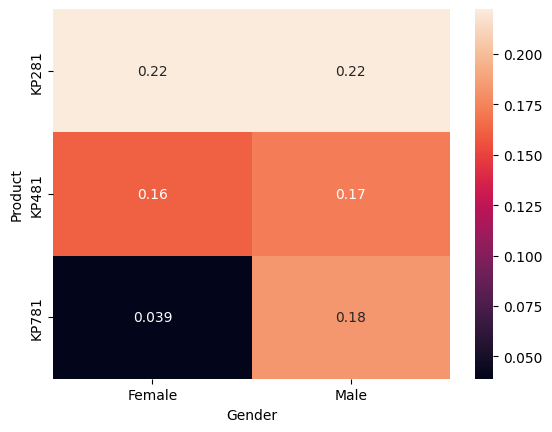

In [118]:
#Representing the relationship between product and Gender
sns.heatmap(pd.crosstab(df.Product, [df.Gender],normalize = True),annot = True)
plt.show()

In [119]:
# Probability that customer is Female and Partnered likely to purchase KP281 is
# P(Product/Female& parterned) = P(Product n Female& parterned)/P('F&P')
print('Probability that customer is Female and Partnered likely to purchase KP281 is',(27/46)*100)

# Probability that customer is Male and Partnered likely to any product
#1. KP281
print('Probability that customer is Male and Partnered likely to  KP281 product: ', (21/61)*100)
#2. KP481
print('Probability that customer is Male and Partnered likely to  KP481 product: ',(21/61)*100)
#3. KP781
print('Probability that customer is Male and Partnered likely to  KP681 product: ',(19/61)*100)

Probability that customer is Female and Partnered likely to purchase KP281 is 58.69565217391305
Probability that customer is Male and Partnered likely to  KP281 product:  34.42622950819672
Probability that customer is Male and Partnered likely to  KP481 product:  34.42622950819672
Probability that customer is Male and Partnered likely to  KP681 product:  31.147540983606557


In [120]:
# Checking the probability of a user according to education category to buy a product.+
pd.crosstab(df.Product, [df.Ed_category], rownames=['Product'], colnames=['Ed_category'],margins=True, margins_name='All')

Ed_category,College,High School,Lower School,Middle School,All
Product,,,,,
KP281,2,39,2,37,80
KP481,2,31,1,26,60
KP781,23,15,0,2,40
All,27,85,3,65,180


In [121]:
print('Probability of a person likely to puchase any product if he is in High School is',np.round((85/180)*100,2))
print('Probability of a person likely to puchase any product if he is in Middle School is',np.round((65/180)*100,2))
print('Probability of a person likely to puchase any product if he is in College School is',np.round((65/180)*100,2))

Probability of a person likely to puchase any product if he is in High School is 47.22
Probability of a person likely to puchase any product if he is in Middle School is 36.11
Probability of a person likely to puchase any product if he is in College School is 36.11


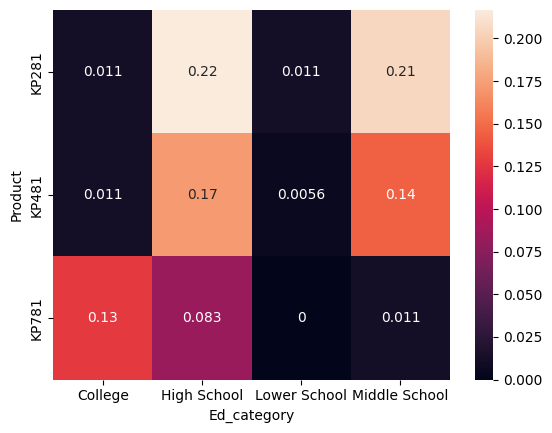

In [122]:
#Representing the relationship between product and Ed_category
sns.heatmap(pd.crosstab(df.Product, [df.Ed_category],normalize = True),annot = True)
plt.show()

**Inference**
1. There are high chances that the perosn who is in high school likes to purchase than College, Middle and lower School.
2. Product which is purchase most by the High School person is KP281

#### Checking the probability between Product and Age:
Dividing the age into different brackets to understand the probability of a particular age group.

In [123]:
def age_cat(age):
    if age >= 10 and age <= 20:
        return '10-20'
    elif age > 20 and age <= 30:
        return '20-30'
    elif age > 30 and age <=40:
        return '30-40'
    else:
        return '40-50'

In [124]:
df['age_cate']= df.Age.apply(age_cat)

In [125]:
pd.crosstab(df.Product, [df.age_cate], rownames=['Product'], colnames=['age_cate'],margins=True, margins_name='All')

age_cate,10-20,20-30,30-40,40-50,All
Product,,,,,
KP281,6,49,19,6,80
KP481,4,31,23,2,60
KP781,0,30,6,4,40
All,10,110,48,12,180


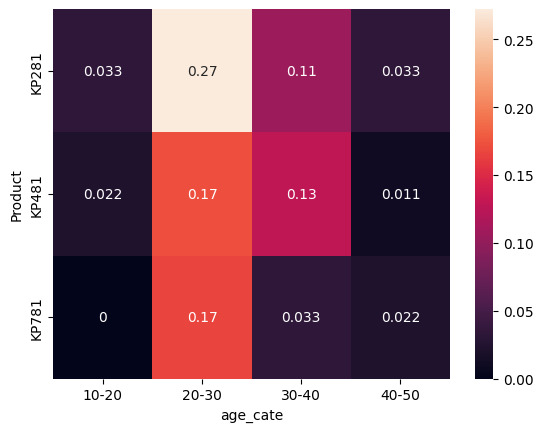

In [126]:
#Representing the relationship between product and Ed_category
sns.heatmap(pd.crosstab(df.Product, [df.age_cate],normalize = True),annot = True)
plt.show()

**Inference**

Probablity that the customer will buy a product if the customer belong to 20-30.
The Target audience for the tredmill is 20 - 40 age group


**Relationship between Product and Avg Usage**

In [127]:
pd.crosstab(df.Product, [df.Avg_Usage], rownames=['Product'], colnames=['Avg_Usage'],margins=True, margins_name='All')

Avg_Usage,Dedicated,Infrequent,Moderate,Regular,All
Product,,,,,
KP281,0,56,22,2,80
KP481,0,45,12,3,60
KP781,9,1,18,12,40
All,9,102,52,17,180


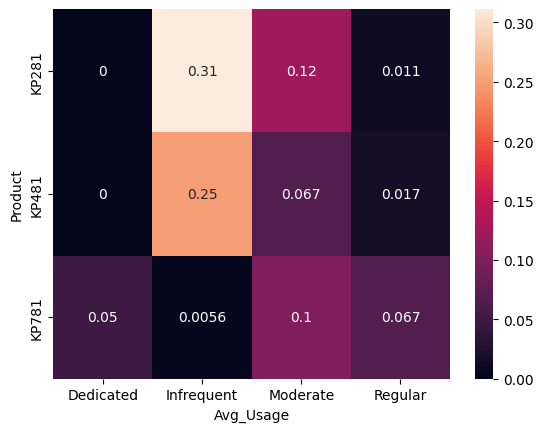

In [128]:
#Representing the relationship between product and Avg_Usage
sns.heatmap(pd.crosstab(df.Product, [df.Avg_Usage],normalize = True),annot = True)
plt.show()

**Inference**
1. It is clearly stated from the data the customer with high usage go for the premium product.
2. Customer with the morderate usage go for the middle model
3. Customer with less usage go for the KP281 or KP481.

**Relationship between Product and Fitness**

In [129]:
pd.crosstab(df.Product, [df.Fitness_rat], rownames=['Product'], colnames=['Fitness_rat'],margins=True, margins_name='All')

Fitness_rat,Excellent Fitness,Fair Fitness,Poor Fitness,All
Product,,,,
KP281,11,54,15,80
KP481,8,39,13,60
KP781,36,4,0,40
All,55,97,28,180


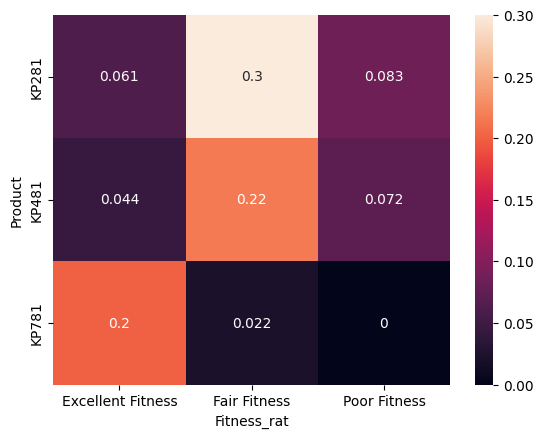

In [130]:
#Representing the relationship between product and Fitness_Rat
sns.heatmap(pd.crosstab(df.Product, [df.Fitness_rat],normalize = True),annot = True)
plt.show()

**Relationship between Product and Income**

In [131]:
def income_cate(x):
    if x < 45000:
        return 'Low Income'
    elif x >= 45000 and x < 65000:
        return 'Average Income'
    else:
        return 'High Income'



In [132]:
df['income_cate'] = df["Income"].apply(income_cate)

In [133]:
pd.crosstab(df.Product, df.income_cate, margins = True, margins_name = 'Total')

income_cate,Average Income,High Income,Low Income,Total
Product,,,,
KP281,44,2,34,80
KP481,43,2,15,60
KP781,16,24,0,40
Total,103,28,49,180


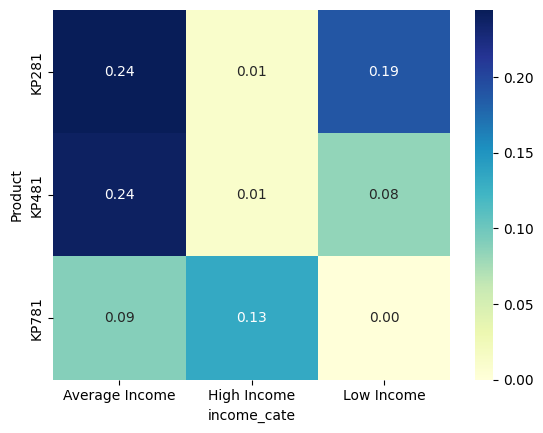

In [134]:
sns.heatmap(pd.crosstab(df.Product, df.income_cate,normalize = True),annot = True,fmt='.2f', cmap='YlGnBu')
plt.show()

**Marginal Probilities:**

In [135]:
# Calculate marginal probabilities for 'Treadmill Models'
mp_p = (df['Product'].value_counts() / len(df['Product'])
        ).reset_index(name='Probability').round(2)

# Calculate marginal probabilities for 'Fitness'
mp_f = (df['Fitness_rat'].value_counts() / len(df['Fitness_rat'])
        ).reset_index(name='Probability').round(2)

# Calculate marginal probabilities for 'Gender'
mp_g = (df['Gender'].value_counts() / len(df['Gender'])
        ).reset_index(name='Probability').round(2)

# Calculate marginal probabilities for 'MaritalStatus'
mp_ms = (df['MaritalStatus'].value_counts() / len(df['MaritalStatus'])
        ).reset_index(name='Probability').round(2)

# Calculate marginal probabilities for 'Usage'
mp_u = (df['Usage'].value_counts() / len(df['Usage'])
        ).reset_index(name='Probability').round(2)

# Calculate marginal probabilities for 'AgeGroup'
mp_ag = (df['age_cate'].value_counts() / len(df['age_cate'])
        ).reset_index(name='Probability').round(2)

# Calculate marginal probabilities for 'Usage'
mp_e = (df['Ed_category'].value_counts() / len(df['Ed_category'])
        ).reset_index(name='Probability').round(2)

# Calculate marginal probabilities for 'AgeGroup'
mp_ic = (df['income_cate'].value_counts() / len(df['income_cate'])
        ).reset_index(name='Probability').round(2)

# Display
print('Marginal Probability of Treadmill Models')
print(mp_p)

print('Marginal Probability of Fitness')
print(mp_f)

print("Marginal Probability of Gender")
print(mp_g)

print('Marginal Probability of Marital Status')
print(mp_ms)

print('Marginal Probability of Usage')
print(mp_u)

print('Marginal Probability of Age Group')
print(mp_ag)

print('Marginal Probability of Education')
print(mp_e)

print('Marginal Probability of Income Category')
print(mp_ic)

Marginal Probability of Treadmill Models
  Product  Probability
0   KP281         0.44
1   KP481         0.33
2   KP781         0.22
Marginal Probability of Fitness
         Fitness_rat  Probability
0       Fair Fitness         0.54
1  Excellent Fitness         0.31
2       Poor Fitness         0.16
Marginal Probability of Gender
   Gender  Probability
0    Male         0.58
1  Female         0.42
Marginal Probability of Marital Status
  MaritalStatus  Probability
0     Partnered         0.59
1        Single         0.41
Marginal Probability of Usage
   Usage  Probability
0      3         0.38
1      4         0.29
2      2         0.18
3      5         0.09
4      6         0.04
5      7         0.01
Marginal Probability of Age Group
  age_cate  Probability
0    20-30         0.61
1    30-40         0.27
2    40-50         0.07
3    10-20         0.06
Marginal Probability of Education
     Ed_category  Probability
0    High School         0.47
1  Middle School         0.36
2        Co

###**Graphical Representation of probabilities:**

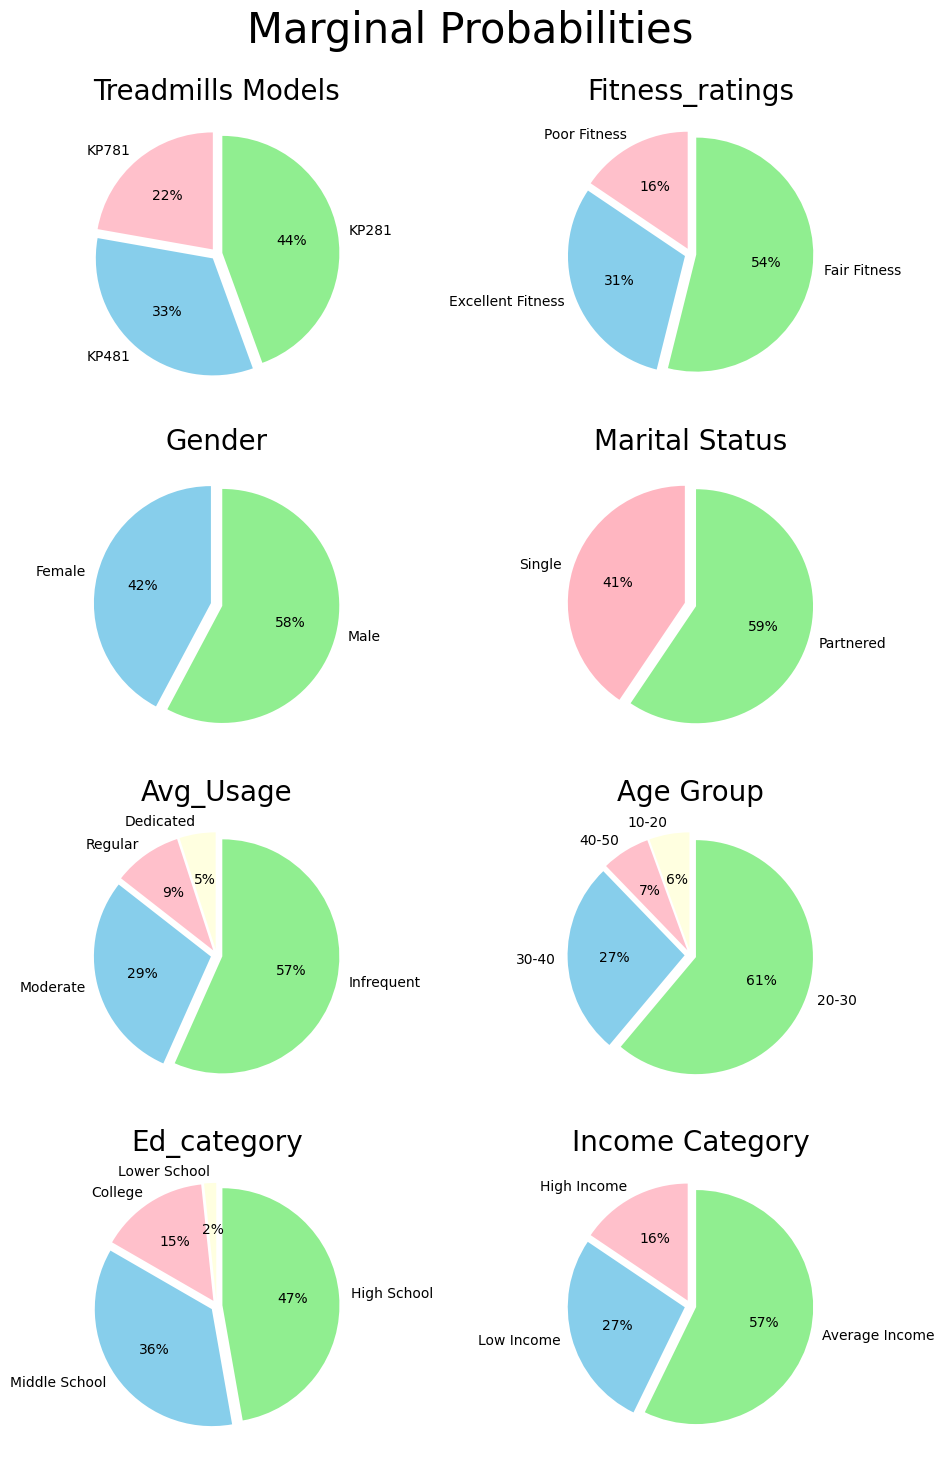

In [136]:
# Distribution of Categorical Variables
plt.figure(figsize=(10,15))
plt.suptitle('Marginal Probabilities', fontsize = 30)

# Pie Chart Showing distribution of Treadmill Models
plt.subplot(4,2,1)
data_p = df['Product'].value_counts()
labels = data_p.index
plt.title('Treadmills Models', fontsize = 20)
plt.pie(data_p, labels=labels, explode = [0.05,0.05,0.05], autopct='%1.0f%%',
        startangle=90, counterclock=False, colors=['lightgreen', 'skyblue', 'pink'])

# Pie Chart Showing distribution of Fitness Score
plt.subplot(4,2,2)
data_p = df['Fitness_rat'].value_counts()
labels = data_p.index
plt.title('Fitness_ratings', fontsize = 20)
plt.pie(data_p, labels=labels, explode = [0.05,0.05,0.05], autopct='%1.0f%%',
        startangle=90, counterclock=False,
        colors=['lightgreen', 'skyblue', 'pink'])

# Pie Chart Showing distribution of Gender
plt.subplot(4,2,3)
data_p = df['Gender'].value_counts()
labels = data_p.index
plt.title('Gender', fontsize = 20)
plt.pie(data_p, labels=labels, explode = [0.05,0.05], autopct='%1.0f%%',
        startangle=90, counterclock=False, colors=['lightgreen', 'skyblue'])

# Pie Chart Showing distribution of Marital Status
plt.subplot(4,2,4)
data_p = df['MaritalStatus'].value_counts()
labels = data_p.index
plt.title('Marital Status', fontsize = 20)
plt.pie(data_p, labels=labels, explode = [0.05,0.05], autopct='%1.0f%%',
        startangle=90, counterclock=False, colors=['lightgreen', 'lightpink'])

# Pie Chart Showing distribution of Usage
plt.subplot(4,2,5)
data_p = df['Avg_Usage'].value_counts()
labels = data_p.index
plt.title('Avg_Usage', fontsize = 20)
plt.pie(data_p, labels=labels, explode = [0.05,0.05,0.05,0.05],
        autopct='%1.0f%%', startangle=90, counterclock=False, colors=['lightgreen',
        'skyblue', 'pink', 'lightyellow'])

# Pie Chart Showing distribution of Age Group
plt.subplot(4,2,6)
data_p = df['age_cate'].value_counts()
labels = data_p.index
plt.title('Age Group', fontsize = 20)
plt.pie(data_p, labels=labels, explode = [0.05,0.05,0.05,0.05], autopct='%1.0f%%',
        startangle=90, counterclock=False, colors=['lightgreen', 'skyblue', 'pink',
                                                   'lightyellow' ,'lightblue'])

# Pie Chart Showing distribution of Education
plt.subplot(4,2,7)
data_p = df['Ed_category'].value_counts()
labels = data_p.index
plt.title('Ed_category', fontsize = 20)
plt.pie(data_p, labels=labels, explode = [0.05,0.05,0.05,0.05],
        autopct='%1.0f%%', startangle=90, counterclock=False, colors=['lightgreen',
        'skyblue', 'pink', 'lightyellow'])

# Pie Chart Showing distribution of Income Category
plt.subplot(4,2,8)
data_p = df['income_cate'].value_counts()
labels = data_p.index
plt.title('Income Category', fontsize = 20)
plt.pie(data_p, labels=labels, explode = [0.05,0.05,0.05], autopct='%1.0f%%',
        startangle=90, counterclock=False, colors=['lightgreen', 'skyblue', 'pink'])

plt.tight_layout(pad= 2.0)
plt.show()

## **5.3:Range of attributes:**

1. Product column has 3 unique Treadmill Products detail, i.e. 'KP281', 'KP481' & 'KP781'.
2. Age column stores the age of the user and ranges from 18 years to 50 years.
3. Gender has 2 unique values, i.e. 'Male' & 'Female'.
4. Education has 8 unique values which shows the educational qualification in years.
5. MaritalStatus has 2 values, i.e. 'Partnered' & 'Single'.
6. Usage shows the information about the usage of Treadmill each week. It ranges from 2 to 7 days.
7. Fitness shows the self rated Fitness Score of user and ranges from 1 to 5.
8. Income is the earnings of user in ($) and ranges from $29,562 to $1,04,581.
9. Miles shows the distance covered by walking/running on Treadmill each week. It ranges from 21 miles to 360 miles.



##**5.4 Distribution of variables:**

**Product Distribution**

Treadmill Model 'KP281' = 44%.
Treadmill Model 'KP481' = 33%.
Treadmill Model 'KP781' = 22%.
Most of the customers buys Treadmill 'KP281'(entry-level) while few customers buys 'KP781'(high-level)

**Fitness Distribution**

Fitness Score 1 = 1%.
Fitness Score 2 = 14%.
Fitness Score 3 = 54%.
Fitness Score 4 = 13%.
Fitness Score 5 = 17%.
Most of the customers rated themselves with a fitness score of 3, means that most of the categorize themselves as average fit

**Gender Distribution**

Male = 58%.
Female = 42%.
Number of male customer who uses Treadmills are greater than the number of female customers.

**Marital Status Distribution**

Single = 41%.
Partnered = 59%.
Number of Partnered customers who uses Treadmills are greater than the number of single customers.

**Usage Distribution**

Usage (in days per week) 2 = 18%
Usage (in days per week) 3 = 38%
Usage (in days per week) 4 = 29%
Usage (in days per week) 5 = 9%
Usage (in days per week) 6 = 4%
Usage (in days per week) 7 = 1%
Most of the Customers uses Treadmills at an average of 3 days per week while very less number of customer uses Treadmills for whole week.

**Age Group Distribution**

Age Group 10-20 = 6%
Age Group 20-30 = 61%
Age Group 30-40 = 27%
Age Group 40-50 = 7%
Customers between Age of 20 to 30 are buying treadmills more than any other age groups.

**Education Distribution**

Education (in years) 12 = 2%
Education (in years) 13 = 3%
Education (in years) 14 = 31%
Education (in years) 15 = 3%
Education (in years) 16 = 47%
Education (in years) 18 = 13%
Education (in years) 20 = 1%
Education (in years) 21 = 2%
Customers who are educated for 16 years are buying Treadmills maximum time.

**Income Category Distribution**

Low Income (I<45k) = 27%
Average Income (45k>I<60k) = 49%
High Income (I>60k) = 23%
From the distribution of income of customers we can see that average income group has purchased Treadmills maximum times.


##**5.5 Comments for each univariate and bivariate plot**

**Univariate plots:**

1. Most sold Treadmill model is 'KP281' while the least sold Treadmill is 'KP781'
2. Maximum Number of customers are in Age group of 20 to 30 Years.
3. The Company has more number of Male customers than Female customers.
4. Maximum Customers have 16 Years of Education while only few customers have 20 Years of Education.
5. The company has more number of Partnered customers than Single Customers.
6. Maximum Number of Customers use the Treadmill for 3 days a week.
7. Most of the customers gave them a self rated Fitness score of 3 while only some customers gave them 1.
8. Maximum Number of customers Lies between $45k to $60k Income Group.
9. Maximum number of customers walks/runs 100 miles/week on an average on Treadmills.

**Bivariate plots:**

A. Gender VS Product

1. Treadmill model 'KP281' has same number of Male and Female customers.

2. Treadmill model 'KP481' also has almost same number of Male and Female customers.

3. Treadmill model 'KP781' has very huge number of Male customers in comparison of Female customers.

B. Education VS Product

1. Customer with 16 Years of education are more likely to purchase Treadmill model 'KP281' and 'KP481'.
2. Customer with 18 Years of education are more likely to purchase Treadmill model 'KP781'.

C. Marital Status VS Product

1. Partnered customers are more likely to buy Treadmill model 'KP281' than Single customers.
2. Partnered customers are more likely to buy Treadmill model 'KP481' than Single customers.
3. Partnered customers are more likely to buy Treadmill model 'KP781' than Single customers.

D. Usage VS Product

1. Most of the customers with Treadmill model 'KP281' & 'KP481' uses the treadmill 3 days/week.
2. Most of the customers with Treadmill model 'KP781' uses the treadmill 4 days/week.

E. Fitness VS Product

1. Most of the customers with Treadmill model 'KP281' & 'KP481' gives themselves a fitness score of 3 out of 5.
2. Most of the customers with Treadmill model 'KP781' gives themselves a fitness score of 5 out of 5.

F. Age Group VS Product

1. Most of the customers for all Treadmill Models belong to the age group of 20 to 30 Years.

G. Income Category VS Product

1. Customers with income ranges from $45k to $60k are more likely to buy Treadmill models 'KP281' & 'KP481'.
2. Customers with income greater than $60k are more likely to buy Treadmill model 'KP781'.


#**6.	Recommendations (10 Points)**

- Aerofit should promote KP784 model to the person whose annual income is in between  40,000 𝑡𝑜 60,000. As combine sales numbers of all 3 models are excellent in this income range and some customer from this income range already bought KP784. So it seems there is good potential to push premium series treadmill.

- There is huge sales gap for KP784 model i.e. only 18% of total sale of KP781 is sold to Female. To increase this number we should gave some offers and trials for females.

- Aerofit should create some awareness reagarding health and product specifically for the person with 15, 20, 21 years of education level. As there is correlation between education and income and we can see there are people with 14 years of education level bought 11 times more machine (55 machines) as compare to level 15 (5 machines).

- Aerofit should promote KP784 model to the person who going to use treadmill 3 times in each week. As people buying good number of KP284 & KP484 who are going to use it for 3 times. We can push by giving trials of our premium model as it has more feature and that will give added advantages to buyer.

- Aerofit should run a some reward point program to encourage customer to increase thier weekly usage of the treadmill in each week and in terms of miles customer going to walk/run. That will definately increase fitness level of the customer. Later we can ask customer to upgrade their existing machine with more featured one and for that they can redeem their reward point.